## Project Dashboard

In [1]:
from DECODER_API import extractSessionHeader
from IPython.display import display

extractSessionHeader()


Press intro: to log in: ·················································································


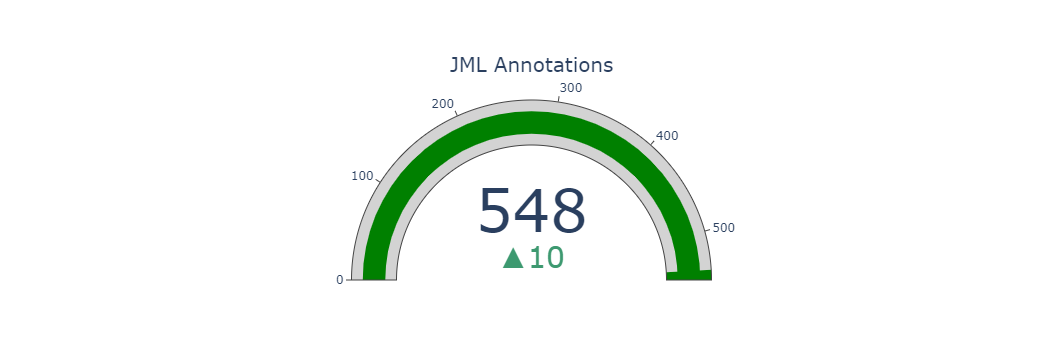

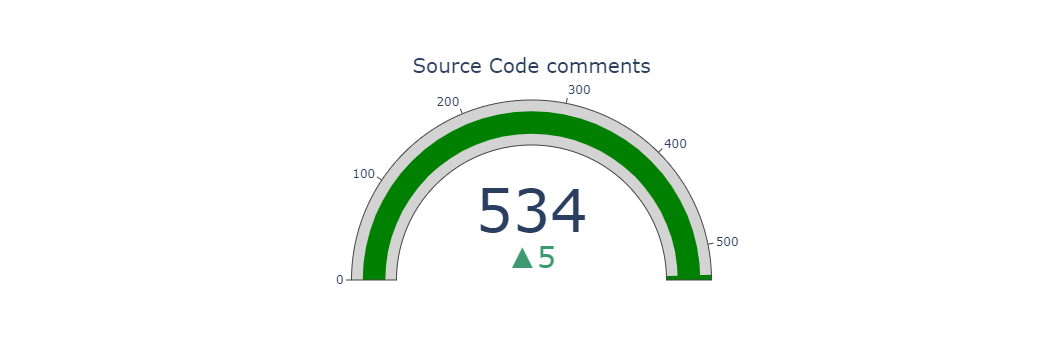

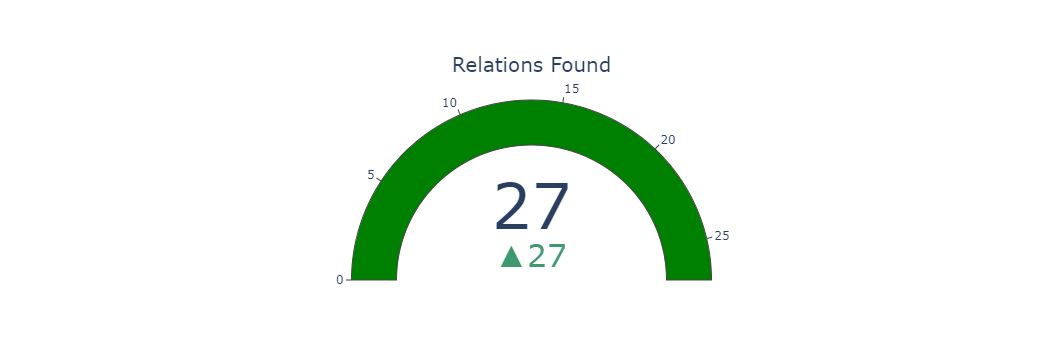

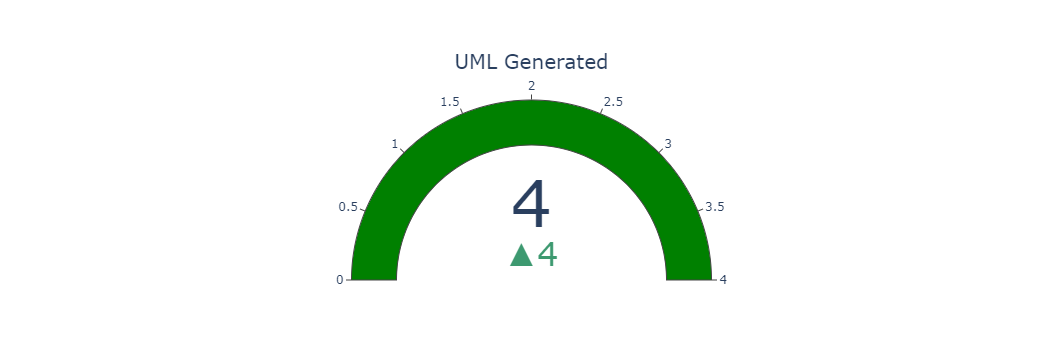

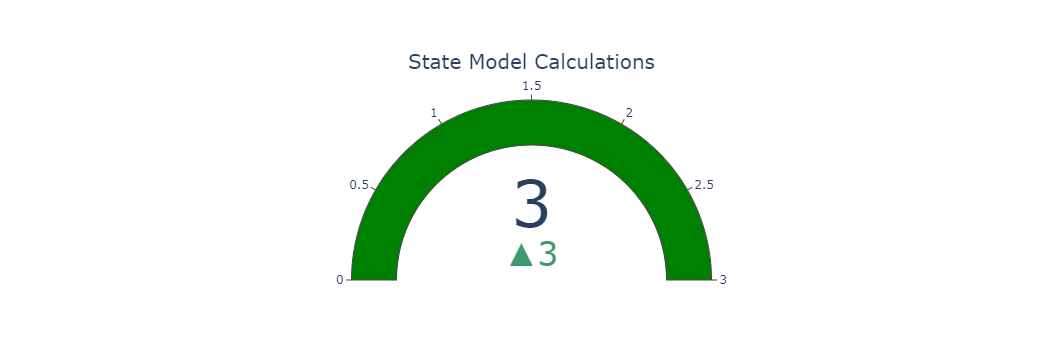

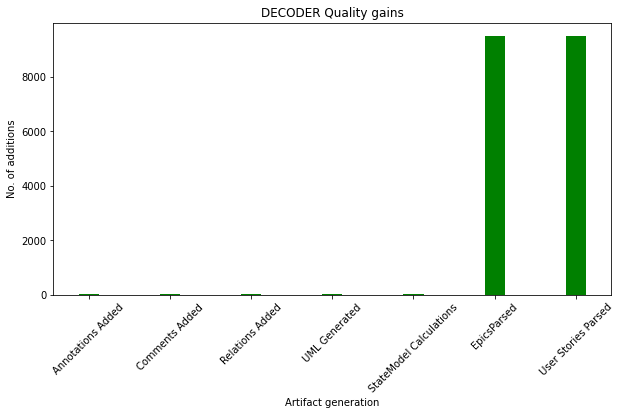

In [3]:
from DECODER_API import getNumberOfCodeSummarizationAdditions,getNumberOfJMLGenAditions, getNumberOfRelationsAdded, getNumberOfUMLAdditions, getNumberOfStateModelCalculations,getNumberOfEpicsParsed,getNumberOfUserStoriesParsed
from DECODER_API import getNumberOfAnnotations, getNumberOfComments, getNumberOFDocuments
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

def drawGauge(total, increase, title):
    fig = go.Figure(go.Indicator(
        mode = "gauge+number+delta",
        value = total,
        domain = {'x': [0, 1], 'y': [0, 1]},
        title = {'text':title},
        delta = {'reference': (total - increase)},
        gauge = {'axis': {'range': [None, total]},
                 'steps' : [
                     {'range': [0, (total - increase)], 'color': "lightgray"},
                     {'range': [(total - increase), total], 'color': "green"}]} ))
    fig.show()

from ipywidgets import Button, HBox, VBox

words = ['correct', 'horse', 'battery', 'staple']
items = [Button(description=w) for w in words]
left_box = VBox([items[0], items[1]])
right_box = VBox([items[2], items[3]])
HBox([left_box, right_box])    
    
count1 = getNumberOfJMLGenAditions()
count1Total = getNumberOfAnnotations()
drawGauge(count1Total,count1, "JML Annotations" )

count2 = getNumberOfCodeSummarizationAdditions()
count2Total = getNumberOfComments()
drawGauge(count2Total,count2, "Source Code comments" )

count3 = getNumberOfRelationsAdded()
drawGauge(count3,count3, "Relations Found" )

count4 = getNumberOfUMLAdditions()
drawGauge(count4,count4, "UML Generated" )

count5 = getNumberOfStateModelCalculations()
drawGauge(count5,count5, "State Model Calculations" )

count6 = getNumberOfEpicsParsed('User-Stories.asciidoc.txt')
count7 = getNumberOfUserStoriesParsed('User-Stories.asciidoc.txt')
count8 = getNumberOFDocuments()


fig = plt.figure(figsize = (10, 5))

labels = ['Annotations Added', 'Comments Added', 'Relations Added',
                    'UML Generated', 'StateModel Calculations', 'EpicsParsed', 'User Stories Parsed']

counts = [count1, count2, count3, count4, count5, count6, count7]

plt.bar(labels, counts, color ='green',
        width = 0.25)
 
plt.xlabel("Artifact generation")
plt.ylabel("No. of additions")
plt.title("DECODER Quality gains")
plt.xticks(rotation=45)
plt.show()
